In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('avocado.csv', index_col=False, parse_dates=['Date'])
data = data.set_index('Date')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.sort_index()
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta


In [3]:
typedum = pd.get_dummies(data['type'])
regdum = pd.get_dummies(data['region'])
# typedum
# regdum

In [40]:
dataFinal = pd.concat([data, typedum, regdum], axis = 1)
dataFinal = dataFinal.drop(['type', 'region'], axis = 1)
# dataFinal.columns

In [41]:
cor = dataFinal.corr()
# sb.heatmap(cor)
# cor
# plt.imshow(cor, cmap='hot')
# plt.xticks(np.arange(len(dataFinal.columns)), dataFinal.columns, rotation=90)
# plt.yticks(np.arange(len(dataFinal.columns)), dataFinal.columns)
# plt.colorbar()
# plt.show()

In [7]:
x = dataFinal.drop(['AveragePrice'], axis = 'columns')
y = dataFinal['AveragePrice']
# x

In [8]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.score(x, y) * 100

55.80455659945838

In [11]:
df1 = dataFinal.index
df1

DatetimeIndex(['2015-01-04', '2015-01-04', '2015-01-04', '2015-01-04',
               '2015-01-04', '2015-01-04', '2015-01-04', '2015-01-04',
               '2015-01-04', '2015-01-04',
               ...
               '2018-03-25', '2018-03-25', '2018-03-25', '2018-03-25',
               '2018-03-25', '2018-03-25', '2018-03-25', '2018-03-25',
               '2018-03-25', '2018-03-25'],
              dtype='datetime64[ns]', name='Date', length=18249, freq=None)

In [18]:
len(x.columns)

65

In [54]:
model.predict(x.values)

array([1.60113778, 1.76215989, 1.7135574 , ..., 1.42223734, 1.7087702 ,
       1.5460232 ])

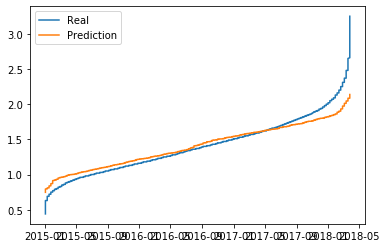

In [55]:
plt.plot(np.sort(x.index),np.sort(y))
plt.plot(np.sort(x.index),np.sort(model.predict(x.values)))
plt.legend(['Real','Prediction'])
plt.show()

In [38]:
y

Date
2015-01-04    1.75
2015-01-04    1.49
2015-01-04    1.68
2015-01-04    1.52
2015-01-04    1.64
2015-01-04    0.75
2015-01-04    0.85
2015-01-04    1.50
2015-01-04    1.00
2015-01-04    0.80
2015-01-04    0.74
2015-01-04    1.82
2015-01-04    1.01
2015-01-04    1.80
2015-01-04    1.81
2015-01-04    1.15
2015-01-04    1.72
2015-01-04    1.56
2015-01-04    1.05
2015-01-04    1.02
2015-01-04    1.19
2015-01-04    1.00
2015-01-04    1.79
2015-01-04    1.22
2015-01-04    1.01
2015-01-04    0.99
2015-01-04    0.95
2015-01-04    1.20
2015-01-04    1.73
2015-01-04    1.05
              ... 
2018-03-25    1.31
2018-03-25    0.96
2018-03-25    1.66
2018-03-25    1.82
2018-03-25    1.30
2018-03-25    1.28
2018-03-25    1.77
2018-03-25    0.59
2018-03-25    1.40
2018-03-25    1.86
2018-03-25    1.59
2018-03-25    2.02
2018-03-25    1.28
2018-03-25    1.23
2018-03-25    1.08
2018-03-25    1.01
2018-03-25    1.31
2018-03-25    1.03
2018-03-25    1.36
2018-03-25    1.45
2018-03-25    1.39
2018-03